In [3]:
import pandas as pd
df = pd.read_csv('/content/energydata_complete (1).csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
simple_linear_reg_df = df[['T2', 'T6']].sample(15, random_state = 2)

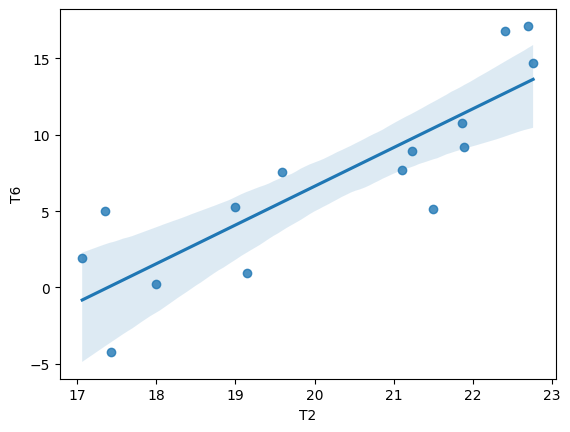

In [5]:
import seaborn as sns
sns.regplot(x = "T2", y = "T6", data = simple_linear_reg_df);

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# We will use 4 independent variables for this
X = df[['T2']].values
y = df['T6'].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# find optimal coefficients and intercept
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# assess the accuraccy of the model
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.8287612797446697
Mean Squared Error: 13.100849590525137
Root Mean Squared Error: 3.619509578730955


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()
df = df.drop(columns=['date', 'lights'])
normalized_df = pd.DataFrame(scaler.fit_transform(df))


In [10]:
df.columns

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [11]:
# Now we split the dataset into training and testing dataset. Recall that we had earlier segementes the features and target variables.
from sklearn.model_selection import train_test_split
#Get the 2 and the last column from the dataset
X = df[['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2']].values
y = df['rv1'].values
print(X)
print(y)
# x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target, test_size=0.3, random_state = 1)
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

[[ 60.          19.89        47.59666667 ...   5.3         13.27543316
   13.27543316]
 [ 60.          19.89        46.69333333 ...   5.2         18.60619498
   18.60619498]
 [ 50.          19.89        46.3        ...   5.1         28.64266817
   28.64266817]
 ...
 [270.          25.5         46.59666667 ...  13.26666667  29.19911708
   29.19911708]
 [420.          25.5         46.99       ...  13.23333333   6.32278365
    6.32278365]
 [430.          25.5         46.6        ...  13.2         34.11885059
   34.11885059]]
[13.27543316 18.60619498 28.64266817 ... 29.19911708  6.32278365
 34.11885059]


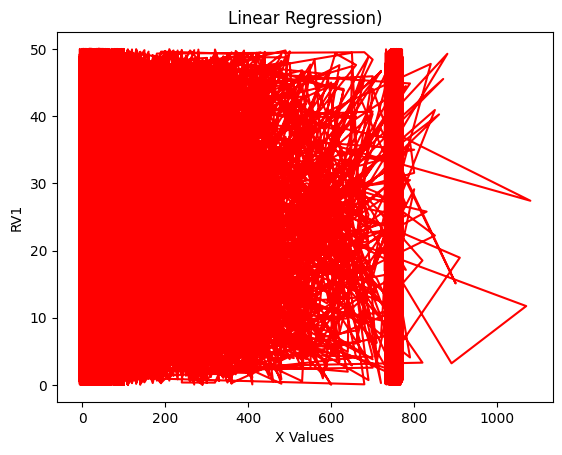

In [13]:
from sklearn.linear_model import LinearRegression
reg_line = LinearRegression()
reg_line.fit(X,y)

# Visualize the Linear Regression results
import matplotlib.pyplot as plt
# plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, reg_line.predict(X), color='red')
plt.title('Linear Regression)')
plt.xlabel('X Values')
plt.ylabel('RV1')
plt.show()

In [16]:
y_pred = reg_line.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

ValueError: ignored